## Import

In [152]:
import pandas as pd
import seaborn as sns
import folium

In [34]:
df = pd.read_csv('ab_raw.csv' )

df1 = df.copy()

## Questions

##### 1. Qual o valor médio do aluguel na cidade de Nova York?

In [174]:
round(df1['price'].mean(), 2)


152.72

##### 2. Quais os nomes das regiões que existem na cidade de Nova York?

In [36]:
df1['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

##### <font color='red'> 3. Qual o valor do aluguel diário mais caro da cidade de Nova York? </font>

In [181]:
df1.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [182]:
df1['price'] = df1['price'].astype(float)

In [185]:
df1.head(4)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194


In [184]:
df1['price'].max()

10000.0

##### 4. Quais são as categorias de imóveis que estão cadastradas dentro da base de dados da cidade de Nova York?


In [37]:
df1['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

##### 5. Como é a variação dos preços ( desvio padrão ) dos imóveis em NY?


In [38]:
df1['price'].std()

240.15416974718727

##### 6. Quantos imóveis com preço acima da média e quantos abaixo da média?


In [55]:
df1['id'].count()

48895

In [57]:
mean_price = df1['price'].mean()
df1[df1['price'] > mean_price].shape[0]

14879

In [59]:
df1[df1['price'] < mean_price].shape[0]


34016

In [60]:
mean_price = df1['price'].mean()
above_mean_count = df1[df1['price'] > mean_price].shape[0]
below_mean_count = df1[df1['price'] < mean_price].shape[0]

print(f"Imóveis acima da média de preço: {above_mean_count}")
print(f"Imóveis abaixo da média de preço: {below_mean_count}")


Imóveis acima da média de preço: 14879
Imóveis abaixo da média de preço: 34016


##### <font color='red'>7. Qual a distribuição do número de Reviews? Existem mais imóveis com muitos ou mais imóveis com poucas reviews? </font>


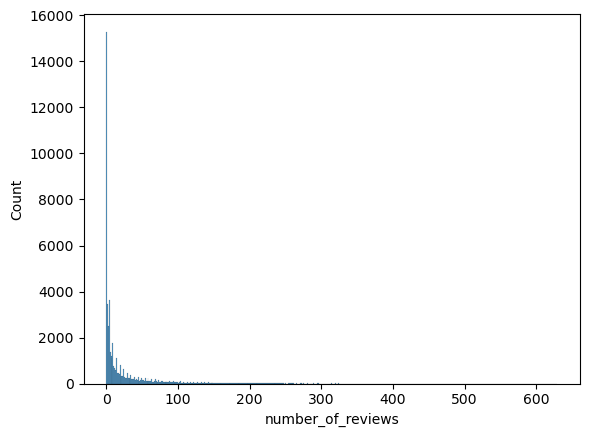

In [63]:
sns.histplot(df1['number_of_reviews']);

In [ ]:
sns.histplot( df1[df1['number_of_reviews'] < 20 ]);


##### 8. Qual a data mais antiga da última avaliação feita?


In [77]:
df1['last_review'] = pd.to_datetime( df1['last_review'])

In [84]:
df1['last_review'].min()

Timestamp('2011-03-28 00:00:00')

##### 9. Qual é o valor do aluguel (diária) mais caro de cada região da base de dados da cidade de Nova York?


In [93]:
df1[ [ 'price', 'neighbourhood_group' ]].groupby('neighbourhood_group').max().sort_values('price', ascending=False).reset_index()

,neighbourhood_group,price
0,Brooklyn,10000
1,Manhattan,10000
2,Queens,10000
3,Staten Island,5000
4,Bronx,2500


##### 10. Qual o valor médio do Tempo (dias) em que o anúncio está disponível na plataforma?


In [94]:
df1.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [96]:
# ??? Acho que n entendi a pergunta
df1['availability_365'].mean()

112.78132733408324

##### 11. Desenhe o histograma do Tempo (dias) em que o anúncio está disponível na plataforma.


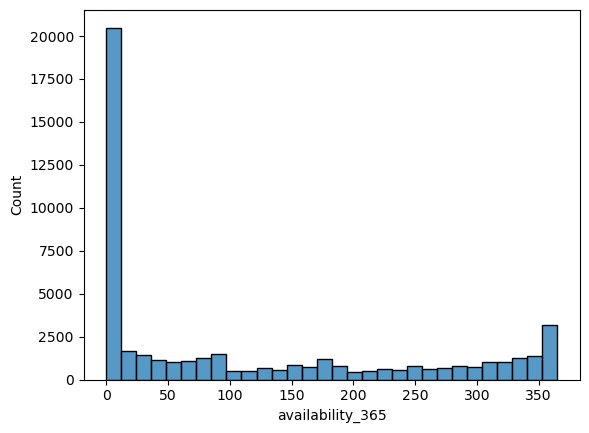

In [104]:
# ???
sns.histplot( x=df1['availability_365'] );

##### <font color='red'>12. Desenho um histograma das Diárias Mínimas para Locação. </font>


In [105]:
df1.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [125]:
df1[['name', 'minimum_nights']].groupby('name').min().reset_index()

,name,minimum_nights
0,1 Bed Apt in Utopic Williamsburg,2
1,2-3 bedroom UWS garden triplex,30
2,3 bedroom loft in Williamsburg,2
3,A charming Space in Brooklyn,2
4,AMAZING TIME SQUARE!!BRICK WALLS!!,30
...,...,...
47900,한성 韓城 Han B (2F),1
47901,한성 韓城 Han C (2F),1
47902,️CENTRALLY LOCATED️- Great for Families + Groups,2
47903,ｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞのかわいいお部屋です2,2


In [118]:
aux = df1['minimum_nights'].min()
sns.kdeplot( x='id', y=aux );

ValueError: Could not interpret value `id` for parameter `x`

##### <font color='red'> 13. Desenhe o histograma da Quantidade de Anúncios do Host do Imóvel. </font>


In [119]:
df1.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


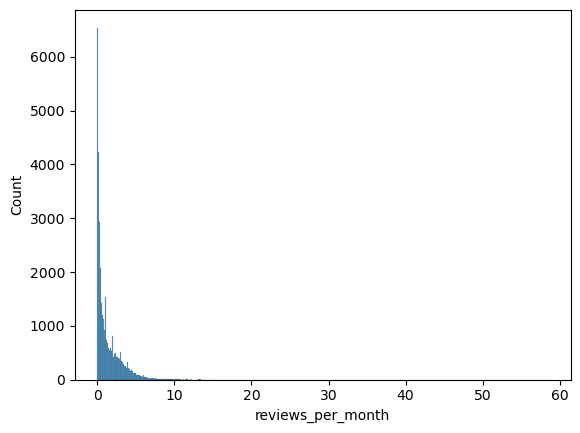

In [122]:
sns.histplot(x=df1['reviews_per_month']);

##### 14. Desenhe um mapa da cidade de Nova York, localizando somente os top 10 imóveis com mais avaliações, por região.


In [ ]:
# Localizar os 10 imóveis com mais avaliações
# Selecionar as colunas necessárias para o mapa
# Fazer um mapa

In [177]:
df1.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [178]:
df1[ [ 'number_of_reviews', 'host_id' ] ].groupby('host_id').count().sort_values('number_of_reviews', ascending=False).reset_index().head(10)


,host_id,number_of_reviews
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,1475015,52


In [179]:
df1[ [ 'number_of_reviews', 'name' ] ].groupby('name').count().sort_values('number_of_reviews', ascending=False).reset_index().head(10)


,name,number_of_reviews
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,Brooklyn Apartment,12
4,Private Room,11
5,Loft Suite @ The Box House Hotel,11
6,Artsy Private BR in Fort Greene Cumberland,10
7,Private room,10
8,Private room in Brooklyn,8
9,Cozy Brooklyn Apartment,8


In [169]:
mais_aval = df1[['number_of_reviews', 'name', 'neighbourhood_group', 'latitude', 'longitude']].sort_values('number_of_reviews', ascending=False).head(10)

# Calcular a latitude e longitude médias
mean_latitude = mais_aval['latitude'].mean()
mean_longitude = mais_aval['longitude'].mean()

# Desenhar o mapa
map_ = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=11)

for index, location_info in mais_aval.iterrows():
    folium.Marker([location_info['latitude'],
                   location_info['longitude']],
                  popup=location_info['name']).add_to(map_)

map_


##### 15. Desenhe um mapa da cidade de Nova York, localizando somente os top 50 maiores preços.


In [164]:
df1.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [171]:
df1[ [ 'price', 'name' ] ].groupby('name').max().sort_values('price', ascending=False).reset_index().head(10)

,name,price
0,1-BR Lincoln Center,10000
1,Furnished room in Astoria apartment,10000
2,Luxury 1 bedroom apt. -stunning Manhattan views,10000
3,2br - The Heart of NYC: Manhattans Lower East ...,9999
4,"Quiet, Clean, Lit @ LES & Chinatown",9999
5,Spanish Harlem Apt,9999
6,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,8500
7,Film Location,8000
8,East 72nd Townhouse by (Hidden by Airbnb),7703
9,Gem of east Flatbush,7500


In [180]:
over_priced = df1[['price', 'name', 'neighbourhood_group', 'latitude', 'longitude']].sort_values('price', ascending=False).head(50)

# Calcular a latitude e longitude médias
mean_latitude = over_priced['latitude'].mean()
mean_longitude = over_priced['longitude'].mean()

# Desenhar o mapa
map_ = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=11)

for index, location_info in over_priced.iterrows():
    folium.Marker([location_info['latitude'],
                   location_info['longitude']],
                  popup=location_info['name']).add_to(map_)

map_


##### 16. Desenhe um mapa da cidade de Nova York, localizando somente os top 10 menores preços, por região.


##### 17. Desenhe um gráfico de barras, mostrando a média de aluguel diária de cada região.


##### 18. Desenhe um gráfico de barras, mostrando a mediana de aluguel diária de cada região.


##### 19. Desenhe um gráfico de barras, mostrando a soma de todos os valores da diária de cada região.


##### 20. Desenhe um gráfico de barras, mostrando o menor valor de diária de cada região.


##### 21. Faça um Dashboard no Streamlit com o resultado das questões: 1, 3, 5, 14 e 17.